# Project Title: Customer Churn Analysis and Prediction
## Project Overview:
### The project aims to analyze customer churn in a telecommunications company and develop
### predictive models to identify at-risk customers. The ultimate goal is to provide
### actionable insights and recommendations to reduce churn and improve customer retention.

#### The project will be conducted into tasks.

###
## Task 1: Data Cleaning and Preprocessing
### Let's load the dataset.

In [301]:
import pandas as pd
import numpy as np
%pip install nbformat
%pip install --upgrade nbformat
%pip install plotly
import plotly.graph_objects as go
import plotly.express as px
df = pd.read_csv('Telco_Customer_Churn_Dataset.csv')

### This command is used to see what we have in our hands.

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### The dataset has 7043 entries(rows) and 21 columns with differents data types. 

## Data Cleaning

### Verify for null values.

In [303]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### This dataset is fine, but that's not always the case.
#### What can be done if values are missing?
#### 1. Remove NaN(default) Values
#### This can cause data loss if many rows are affected.
```
df_cleaned_rows = df.dropna()
```
#### 2. Remove rows only if all values are NaN.
```
df_cleaned_all = df.dropna(how='all')
```

#### Replacing NaN is a better approach.
#### 1. For numerical data.
```
df_filled_mean = df.fillna(df.mean())
```

#### 2. Forward or Backward Fill(using neighboring values).
- `method='ffill'` or `method='pad'`: Forward fill (use the previous valid value)
- `method='bfill'` or `method='backfill'`: Backward fill (use the next valid value)


### If we recall, there's an inconsistency in the column names, let's fix that.

In [304]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [305]:
# follow a unified naming convention.
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

### Now, we continue with data type validation to ensure calculations would work correctly.

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [307]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### The column `totalcharges` has a wrong data type. Let's change that.

In [308]:
# Check for the total count of empty spaces
len(df.loc[df['totalcharges'] == ' '])

11

In [309]:
# Change data type of column totalcharges to float and change empty values to NaN
df.totalcharges = pd.to_numeric(df.totalcharges, errors="coerce")

In [310]:
# Fill NaN values with the mean calc
df.fillna(round(df.totalcharges.mean(), 3), inplace=True)

In [311]:
# Change data type of column totalcharges to float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


### Before continuing to the encoding, the `customerid` column must be removed since it doesn't contribute anything to the analysis.

In [312]:
df.drop(columns=['customerid'], inplace=True)

In [313]:
# Check if columns have only 1 value to remove it
for col in df.columns:
    print(f"Unique count values in column '{col}': {len(df[col].unique())}")

Unique count values in column 'gender': 2
Unique count values in column 'seniorcitizen': 2
Unique count values in column 'partner': 2
Unique count values in column 'dependents': 2
Unique count values in column 'tenure': 73
Unique count values in column 'phoneservice': 2
Unique count values in column 'multiplelines': 3
Unique count values in column 'internetservice': 3
Unique count values in column 'onlinesecurity': 3
Unique count values in column 'onlinebackup': 3
Unique count values in column 'deviceprotection': 3
Unique count values in column 'techsupport': 3
Unique count values in column 'streamingtv': 3
Unique count values in column 'streamingmovies': 3
Unique count values in column 'contract': 3
Unique count values in column 'paperlessbilling': 2
Unique count values in column 'paymentmethod': 4
Unique count values in column 'monthlycharges': 1585
Unique count values in column 'totalcharges': 6530
Unique count values in column 'churn': 2


# Encoding categorical variables
### One-hot encoding is a technique used to convert categorical variables into a numerical format that machine learning models can understand without assuming any arbitrary order or hierarchy
### The categorical columns must be separated from the numerical ones.

In [314]:
# create categorical columns
categorical_cols = list(df.dtypes[df.dtypes == 'object'].index)
categorical_cols

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

### Continuing with the process, we checked for duplicates.

In [315]:
df.duplicated().sum()

np.int64(22)

### Duplicates can inflate calculations in the analysis, so we simply remove them.

In [316]:
df = df.drop_duplicates()

In [317]:
binary_map_cols = ['partner', 'dependents', 'paperlessbilling']
for col in binary_map_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

In [318]:
# create numerical columns
numerical_cols = list(df.dtypes[df.dtypes != 'object'].index)
numerical_cols

['seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'paperlessbilling',
 'monthlycharges',
 'totalcharges']

In [319]:
# encode categorical values into int
df_encoded = pd.get_dummies(df, columns=categorical_cols, dtype=int)

In [320]:
df_encoded.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_0,partner_1,dependents_0,dependents_1,...,contract_One year,contract_Two year,paperlessbilling_0,paperlessbilling_1,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_No,churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


# End of Task 1
## Data Cleaning Preprocessing
### This task involved several key steps such as:

#### 1. Handling Null / NaN Values
#### 2. Eliminated redundant columns including ID fields
#### 3. Standardized column data types for consistency
#### 4. Applied uniform naming conventions across all columns
#### 5. Replaced values in categorical columns to be more consistent.
#### 6. Perform One-Hot Encoding for categorical columns.
#

## Task 2: Exploratory Data Analysis (EDA)

### Calculate and visualize the overall churn rate

In [321]:
df.churn.value_counts(normalize=True)

churn
No     0.735508
Yes    0.264492
Name: proportion, dtype: float64

In [322]:
global_churn_rate = df.churn.value_counts(normalize=True).tolist()
global_churn_rate

[0.7355077624270047, 0.2644922375729953]

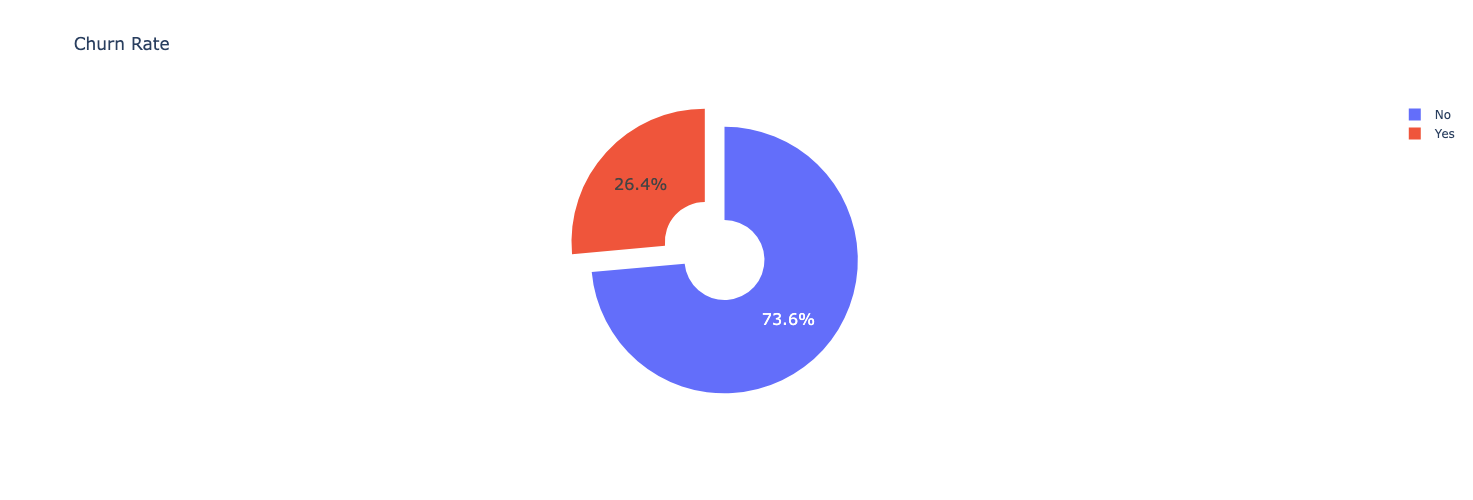

In [323]:
labels = ['No','Yes']
values = global_churn_rate
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, pull=[0, 0.2], )])
fig.update_layout(title_text='Churn Rate')

fig.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')
fig.update_layout(width=700, height=500)
fig.show()

### Customer distribution by various demographics

In [324]:
def exp_distribution(columns):
    for col in columns:
        freq = df[col].value_counts(normalize=True).reset_index()
        freq.columns = [f'{col}', 'distribution']
        print('-'*40+'\n', freq)

In [325]:
print('Distribution of categorical data')
exp_distribution(categorical_cols)

Distribution of categorical data
----------------------------------------
    gender  distribution
0    Male      0.504344
1  Female      0.495656
----------------------------------------
    partner  distribution
0        0      0.515454
1        1      0.484546
----------------------------------------
    dependents  distribution
0           0      0.699473
1           1      0.300527
----------------------------------------
   phoneservice  distribution
0          Yes      0.902863
1           No      0.097137
----------------------------------------
       multiplelines  distribution
0                No      0.479704
1               Yes      0.423159
2  No phone service      0.097137
----------------------------------------
   internetservice  distribution
0     Fiber optic      0.440108
1             DSL      0.344538
2              No      0.215354
----------------------------------------
         onlinesecurity  distribution
0                   No      0.497080
1                

#
### Analyze tenure distribution.

In [326]:
def make_histogram(x, y, text_title, mode):
    title = '<b>' + text_title + '<b>'
    fig = px.histogram(df, x=x, color=y, barmode=mode, title=title, histnorm='percent')
    fig.update_layout(width=700, height=500, bargap=0.1)
    fig.show()

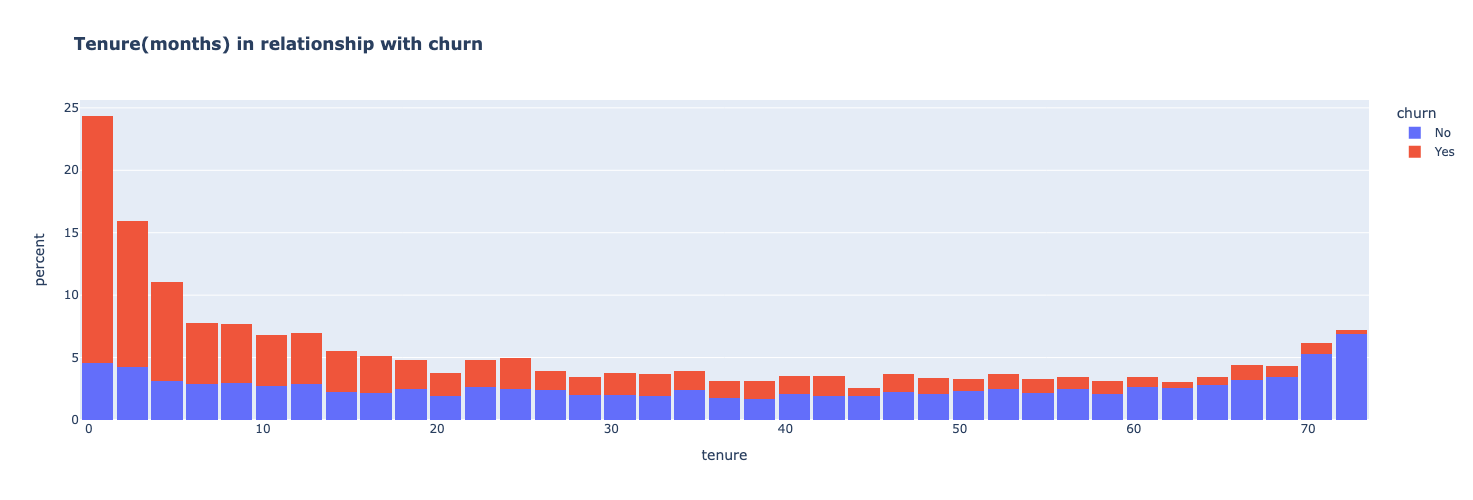

In [327]:
make_histogram('tenure', 'churn', 'Tenure(months) in relationship with churn', 'stack')

### From this graph we can observe that
### * In the first month there is a high churn rate.
### * Not only that, we also see that the churn rate is high from 0 to 2 years.
### * Longer the customers stay more likely they won't churn
### We already find something of importance in the analisis.

#
### Investigate relationships between churn and different contract types/payment methods.

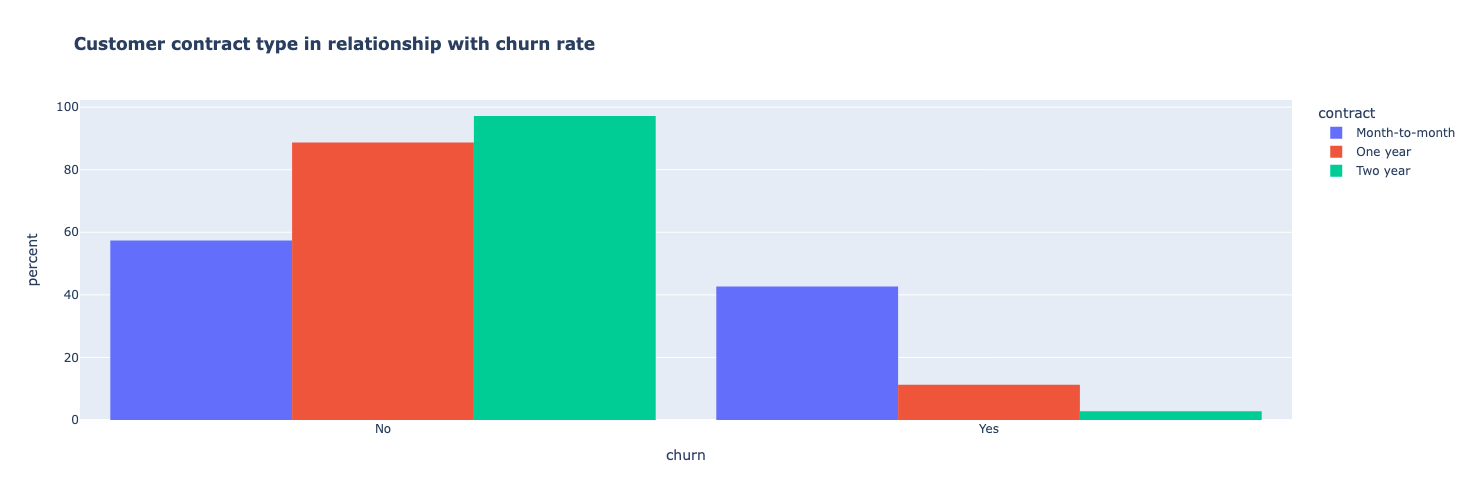

In [328]:
make_histogram('churn', 'contract', 'Customer contract type in relationship with churn rate', 'group')

### Analyzing this graph, we see that customers with a month-to-month contract have a higher churn rate: 42%, compared to 11% for one-year contract and 2% for two-year contract.

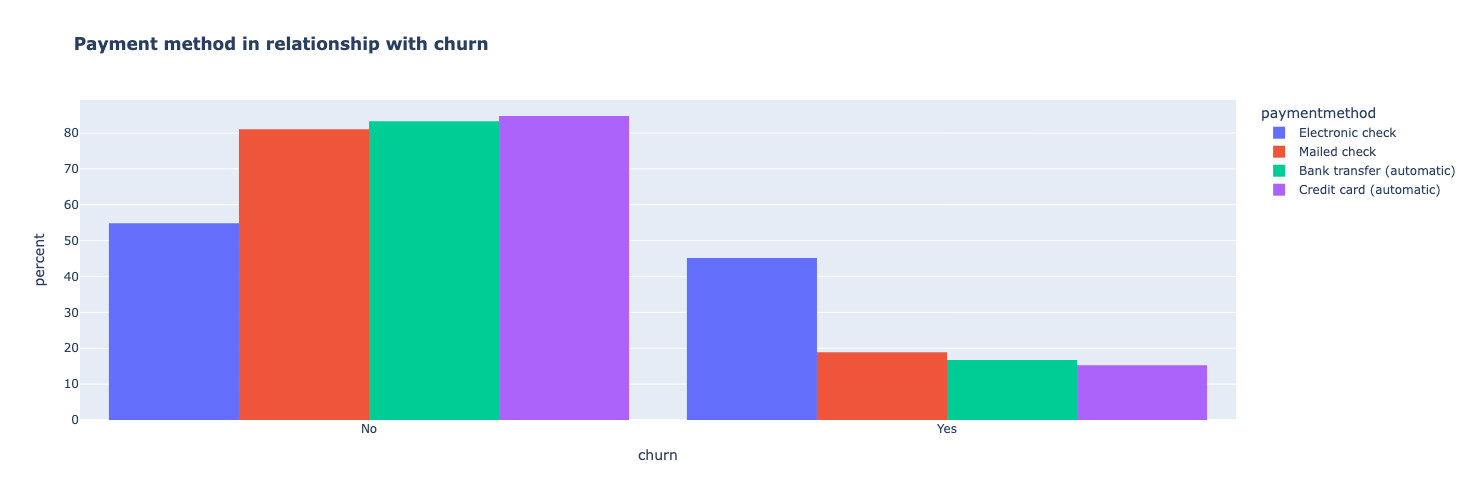

In [329]:
make_histogram('churn', 'paymentmethod', 'Payment method in relationship with churn', 'group')

### Customers with Credit Card, Bank Transfer and Mailed Check as payment method have over 80% of staying.
### Most customers the did churn (45%) had Electronic Check as Payment Method.
#

## Task 3: Customer Segmentation
### Segment customers based on tenure, monthly charges, and contract type.

In [330]:
def make_stack_bar(x_labels, values, names, fig_title):
    dic_yes = []
    dic_no = []
    
    for i in values:
        dic_no.append(i['No'])
        dic_yes.append(i['Yes'])
    
    fig = go.Figure(data=[
        go.Bar(name=names[0], x=x_labels, y=dic_no),
        go.Bar(name=names[1], x=x_labels, y=dic_yes)
    ])
    # Change the bar mode
    fig.update_layout(barmode='stack', title=fig_title)
    fig.show()

### Let's remember the tenure distribution

In [331]:
np.sort(df['tenure'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72], dtype=int64)

### We're going to segment this category by year.

In [332]:
tenure_bins = [0, 12, 24, 36, 48, 60, 72]
tenure_labels = ["0-12", "12-24", "24-36", "36-48", "48-60", "60-72"]
df["tenurebins"] = pd.cut(
    df['tenure'],
    bins=tenure_bins,
    labels=tenure_labels,
    include_lowest=True,
    right=True)
df[['tenure', 'tenurebins']]
#df.drop(columns=['tenure'], inplace=True)

,tenure,tenurebins
0,1,0-12
1,34,24-36
2,2,0-12
3,45,36-48
4,2,0-12
...,...,...
7038,24,12-24
7039,72,60-72
7040,11,0-12
7041,4,0-12


In [333]:
year_1 = df['tenurebins'][df['tenurebins'] == '0-12'].groupby(by=df["churn"]).count()
year_2 = df['tenurebins'][df['tenurebins'] == '12-24'].groupby(by=df["churn"]).count()
year_3 = df['tenurebins'][df['tenurebins'] == '24-36'].groupby(by=df["churn"]).count()
year_4 = df['tenurebins'][df['tenurebins'] == '36-48'].groupby(by=df["churn"]).count()
year_5 = df['tenurebins'][df['tenurebins'] == '48-60'].groupby(by=df["churn"]).count()
year_6 = df['tenurebins'][df['tenurebins'] == '60-72'].groupby(by=df["churn"]).count()
# Since 72 is the maximum value of tenure, year 7 (greater than 72) will not be necessary

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7021 non-null   object  
 1   seniorcitizen     7021 non-null   int64   
 2   partner           7021 non-null   int64   
 3   dependents        7021 non-null   int64   
 4   tenure            7021 non-null   int64   
 5   phoneservice      7021 non-null   object  
 6   multiplelines     7021 non-null   object  
 7   internetservice   7021 non-null   object  
 8   onlinesecurity    7021 non-null   object  
 9   onlinebackup      7021 non-null   object  
 10  deviceprotection  7021 non-null   object  
 11  techsupport       7021 non-null   object  
 12  streamingtv       7021 non-null   object  
 13  streamingmovies   7021 non-null   object  
 14  contract          7021 non-null   object  
 15  paperlessbilling  7021 non-null   int64   
 16  paymentmethod     7021 non-nu

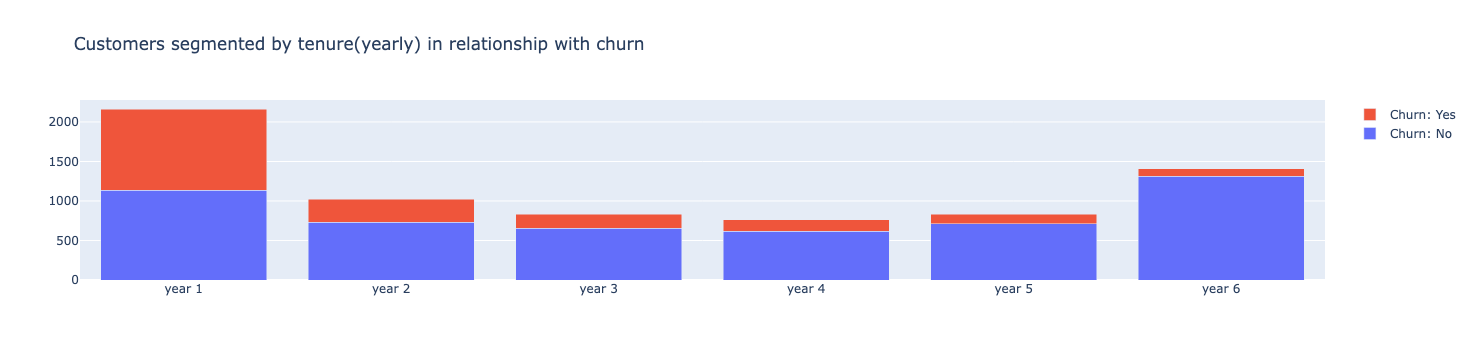

In [335]:
labels=['year 1', 'year 2','year 3','year 4','year 5','year 6']
values = [year_1, year_2, year_3, year_4, year_5, year_6]
names = ['Churn: No', 'Churn: Yes']
make_stack_bar(labels, values, names, 'Customers segmented by tenure(yearly) in relationship with churn')

### As we saw previously, years 1 and 2 are critical in the decision to churn; a 47% will leave by the end of the first year and 28% will churn in the 2nd.

In [336]:
# Segment monthly charges
mc_x = np.sort(df['monthlycharges'].unique())
mc_x

array([ 18.25,  18.4 ,  18.55, ..., 118.6 , 118.65, 118.75], shape=(1585,))

In [337]:
mc_y = []
for val in mc_x:
    mc_y.append(df["monthlycharges"][df["monthlycharges"]==val].count())

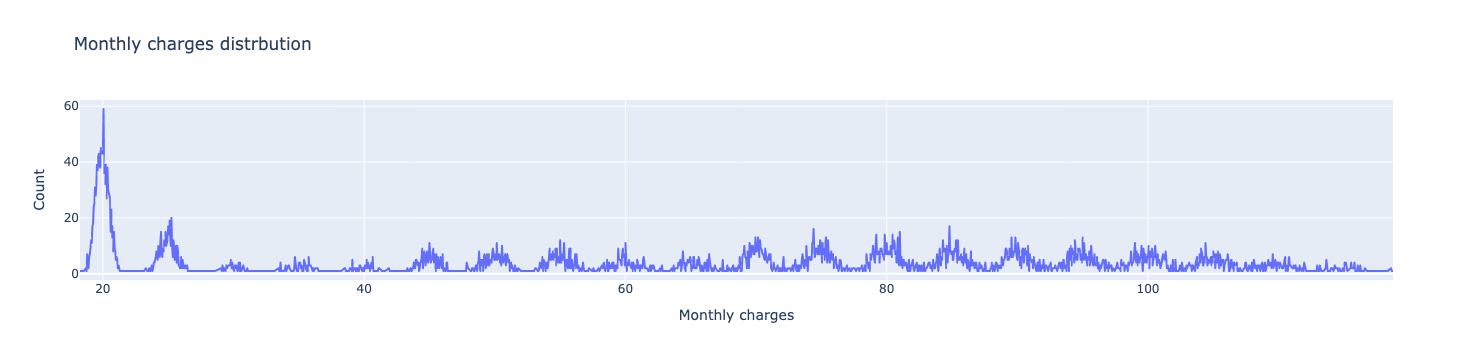

In [338]:
fig = px.line(df, x=mc_x, y=mc_y, title='Monthly charges distrbution')

fig.update_layout(
       
        xaxis=dict(
            title=dict(
                text='Monthly charges'
            )
        ),
        yaxis=dict(
            title=dict(
                text='Count'
            )
        ),
)

fig.show()

### There is a high peak around 20 units, then there is a trend: there will be a peak every 5 units, remaining stable from 45 to 105 and declining after that.

##
### The segments will be divided every 20 units

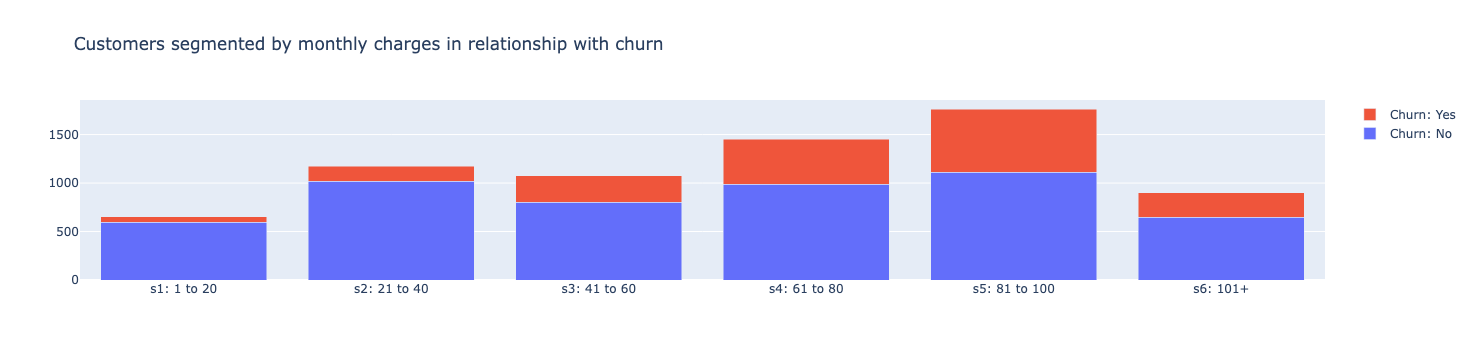

In [339]:
monthlycharges1 = df["monthlycharges"][df["monthlycharges"]<=20.0].groupby(by=df["churn"]).count()
monthlycharges2 = df["monthlycharges"][df["monthlycharges"] > 20.0 ][df["monthlycharges"] <= 40.0].groupby(by=df["churn"]).count()
monthlycharges3 = df["monthlycharges"][df["monthlycharges"] > 40.0 ][df["monthlycharges"] <= 60.0].groupby(by=df["churn"]).count()
monthlycharges4 = df["monthlycharges"][df["monthlycharges"] > 60.0 ][df["monthlycharges"] <= 80.0].groupby(by=df["churn"]).count()
monthlycharges5 = df["monthlycharges"][df["monthlycharges"] > 80.0 ][df["monthlycharges"] <= 100.0].groupby(by=df["churn"]).count()
monthlycharges6 = df["monthlycharges"][df["monthlycharges"] > 100.0 ].groupby(by=df["churn"]).count()

values = [monthlycharges1, monthlycharges2, monthlycharges3,monthlycharges4, monthlycharges5, monthlycharges6]
x_labels=['s1: 1 to 20', 's2: 21 to 40','s3: 41 to 60', 's4: 61 to 80', 's5: 81 to 100', 's6: 101+']
names = ['Churn: No', 'Churn: Yes']
make_stack_bar(x_labels,values,names, 'Customers segmented by monthly charges in relationship with churn')

### From the graph, it can be observed that segment 4 has a churn rate of 32% and segment 5 has a 37%.

### We can see the monthly charges from 41 to 118 have a high churn rate

In [340]:
# Segment contract type
am = df["contract"].unique()
am

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

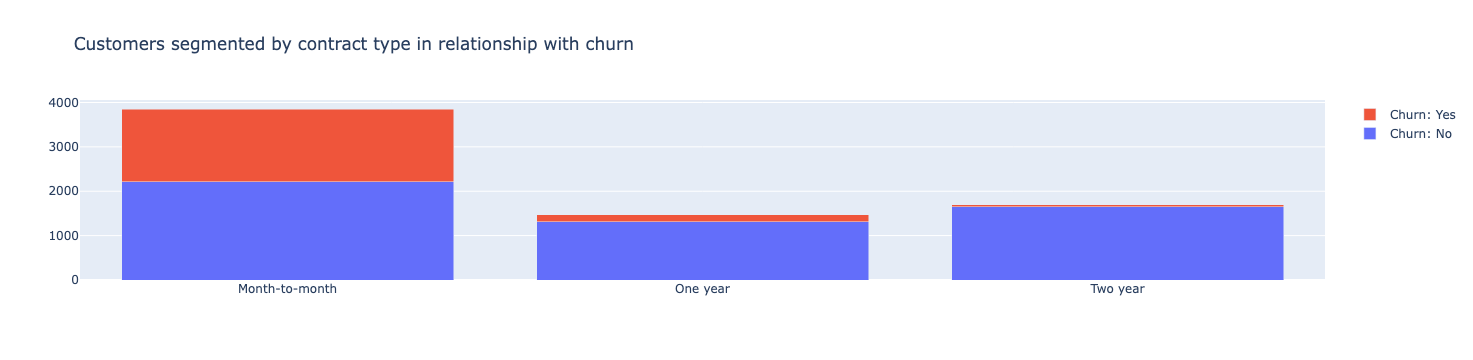

In [341]:
contract1 = df["contract"][df["contract"]=='Month-to-month'].groupby(by=df["churn"]).count()
contract2 = df["contract"][df["contract"]=='One year'].groupby(by=df["churn"]).count()
contract3 = df["contract"][df["contract"]=='Two year'].groupby(by=df["churn"]).count()

values = [contract1, contract2, contract3]
x_labels=['Month-to-month', 'One year', 'Two year']
names = ['Churn: No', 'Churn: Yes']
make_stack_bar(x_labels, values, names, 'Customers segmented by contract type in relationship with churn')

In [342]:
mtmr = (contract1 / contract1.sum()) * 100
mtmr['Yes']

np.float64(42.64209706722035)

### There is a high churn rate among customers with month-to-month contracts, up to 42%.
#

### Before continuing with Task 4, let's look at some other distributions in reference to churn

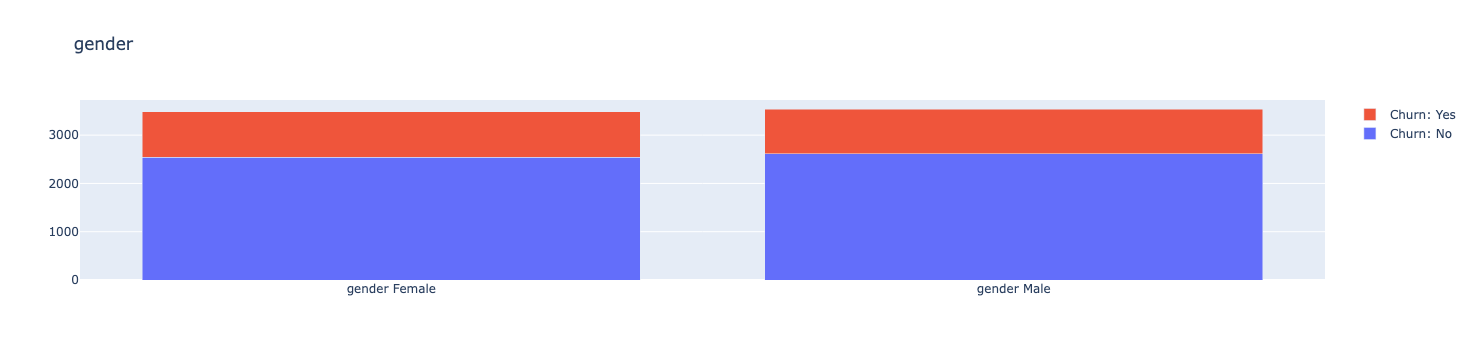

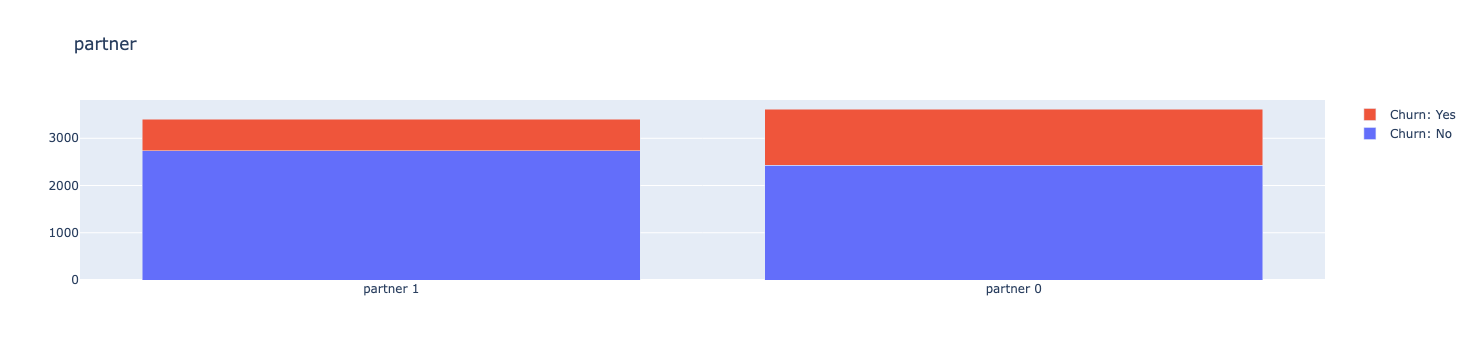

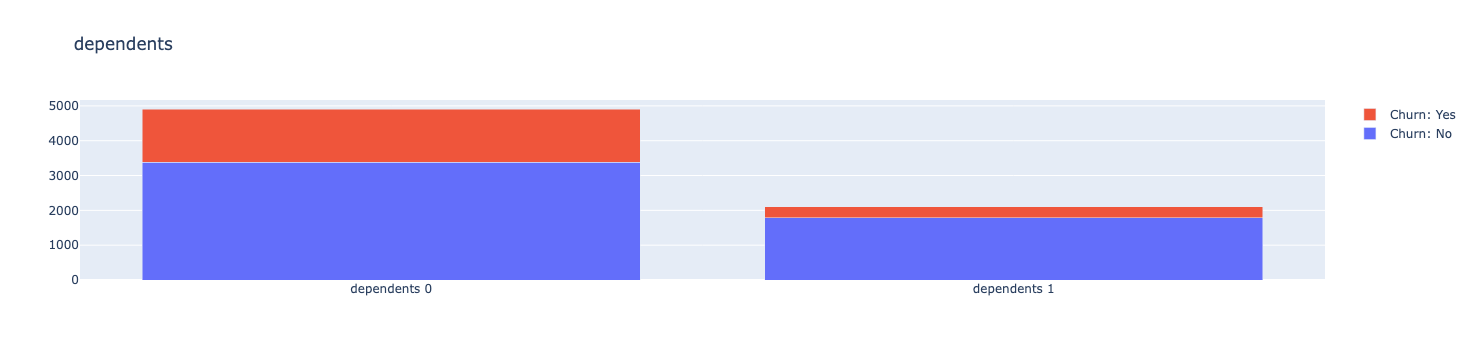

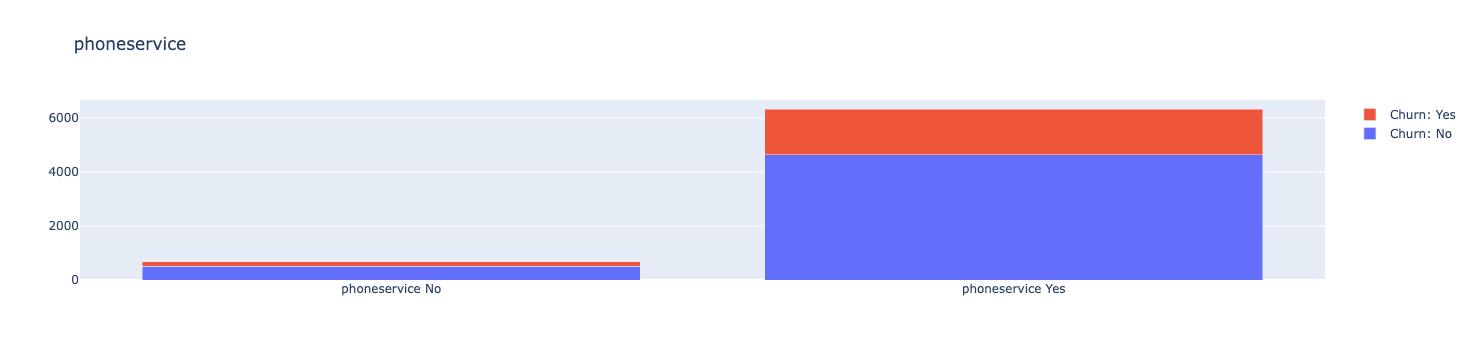

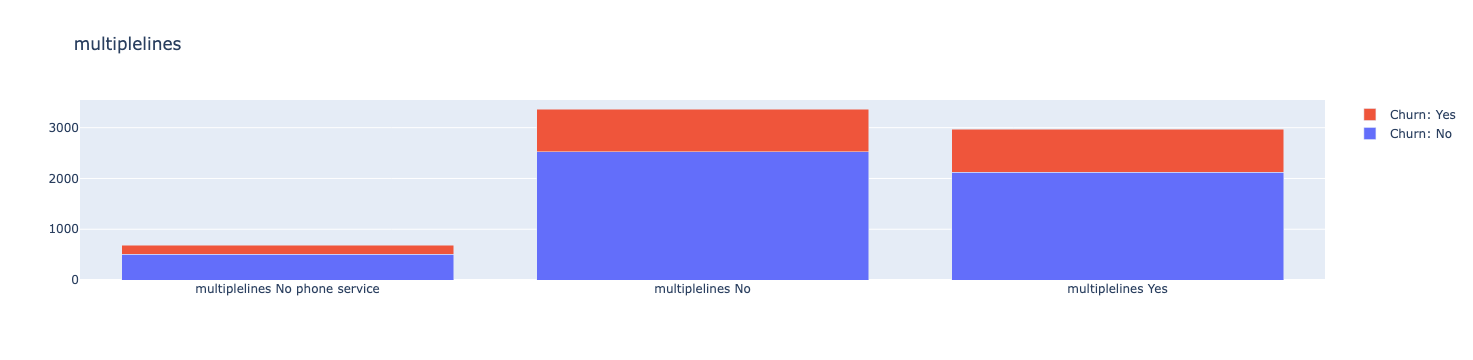

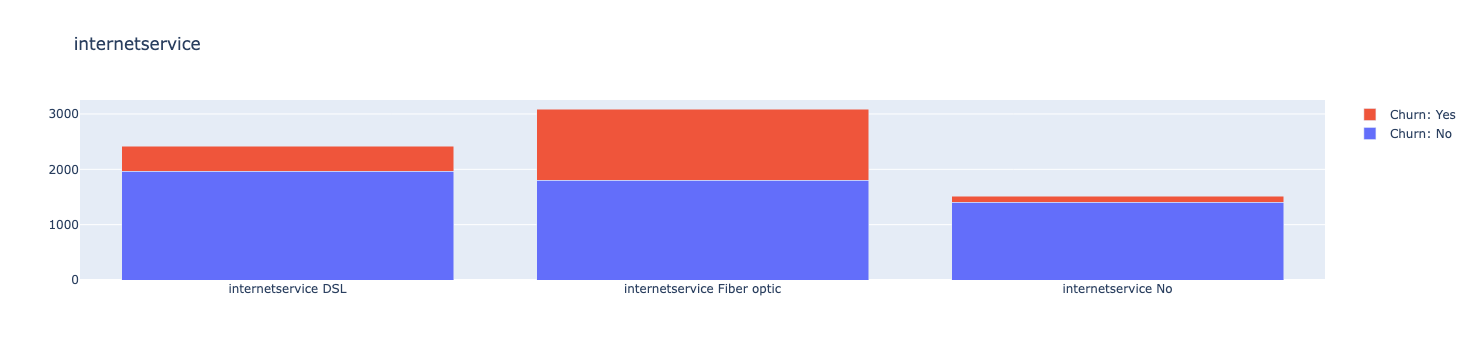

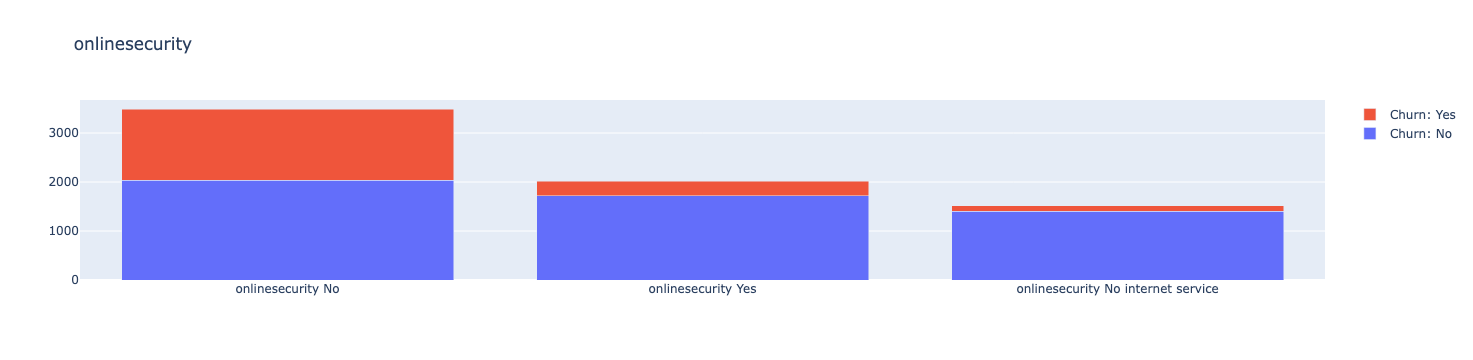

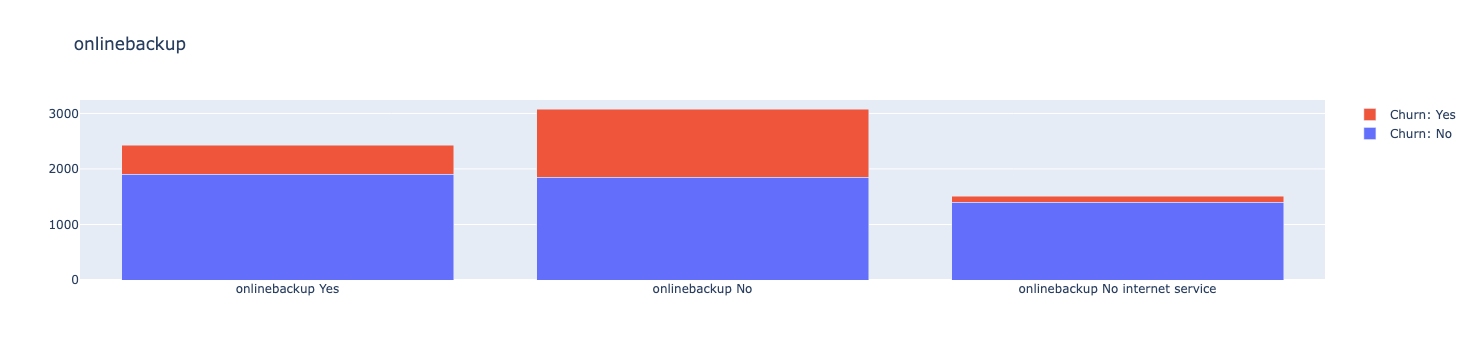

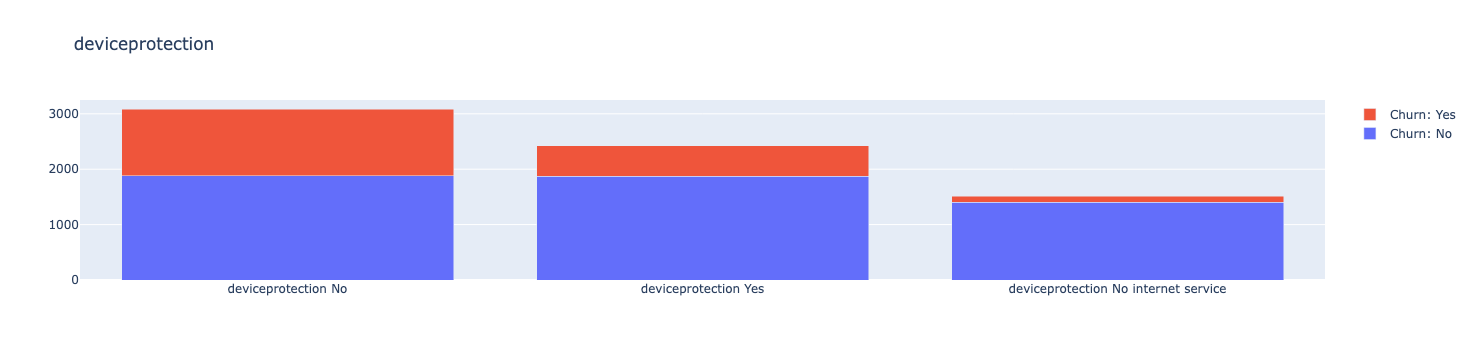

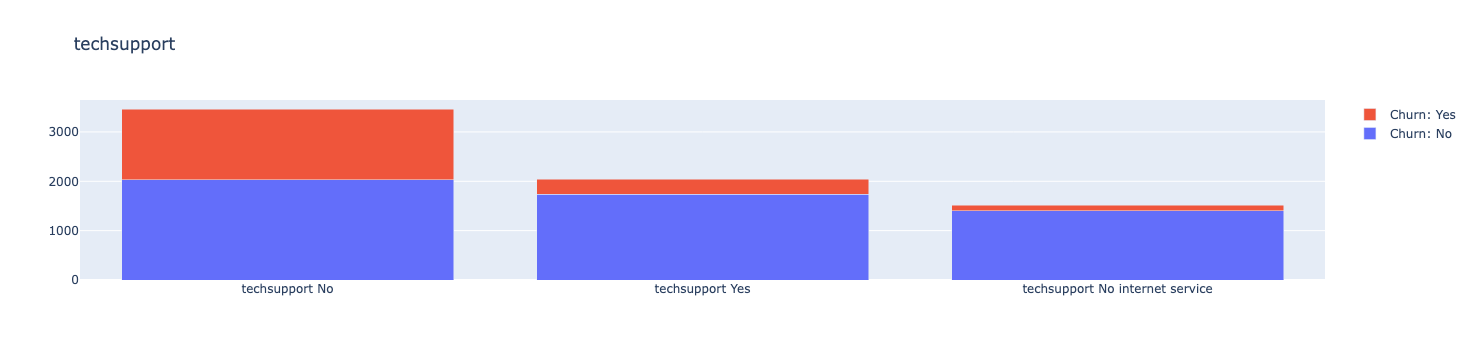

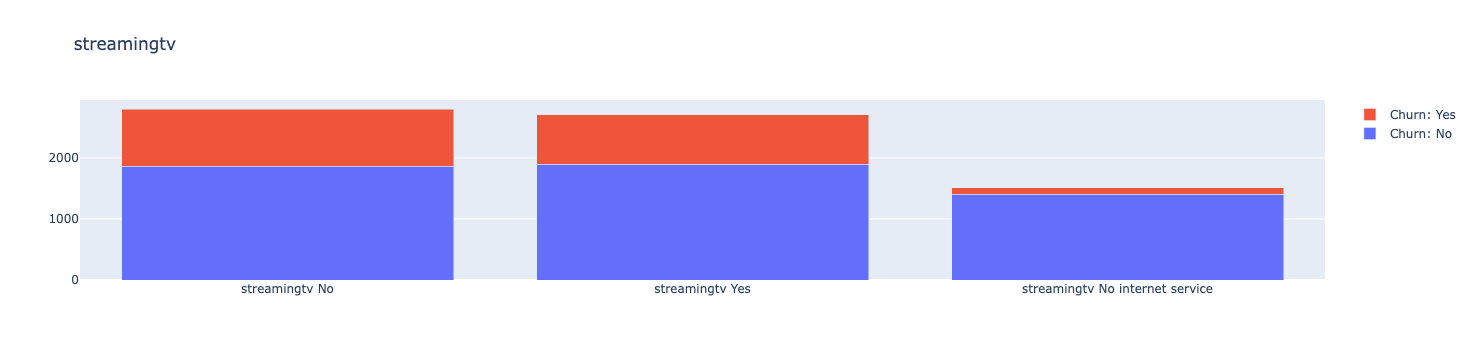

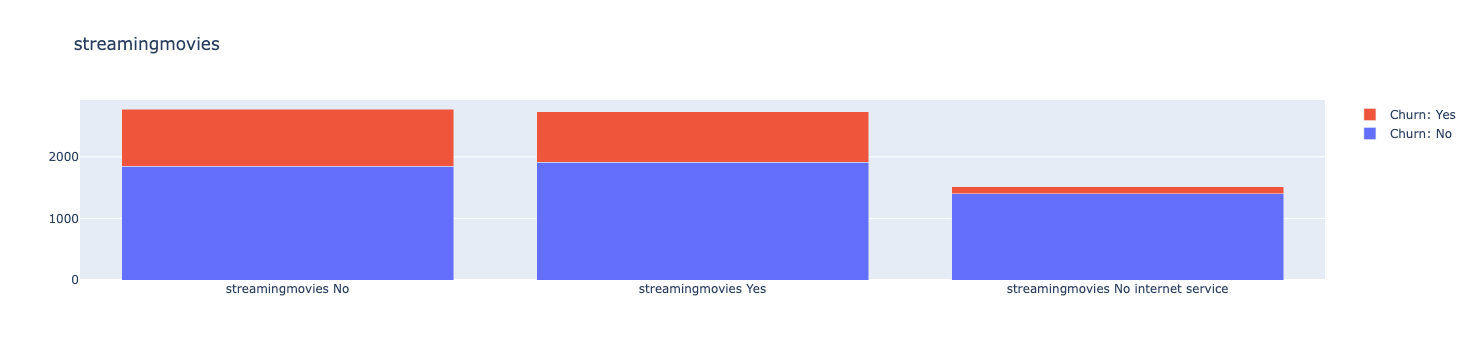

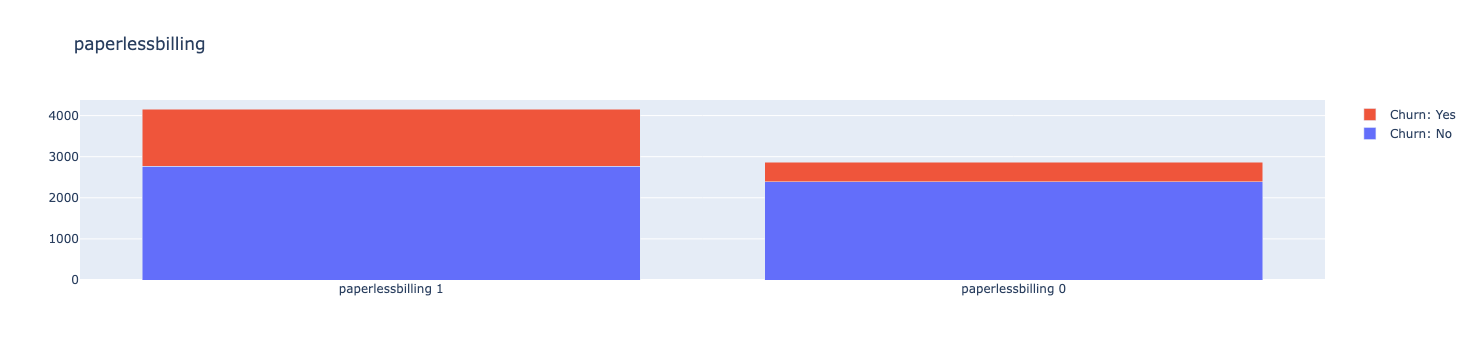

In [349]:
for col in categorical_cols:
    # Already been analyzed
    if col in ['churn', 'contract', 'monthlycharges', 'tenure', 'paymentmethod']:
        continue
    my_keys = df[col].unique()
    ind_labels = []
    ind_values = []
    for key in my_keys:
        indi = df[col][df[col]==key].groupby(by=df["churn"]).count()
        ind_labels.append(col + ' ' + str(key))
        ind_values.append(indi)

    names = ['Churn: No', 'Churn: Yes']
    make_stack_bar(ind_labels,ind_values,names, col)

### The last column we need to see is seniorcitizen

In [350]:
df.seniorcitizen.unique()

array([0, 1], dtype=int64)

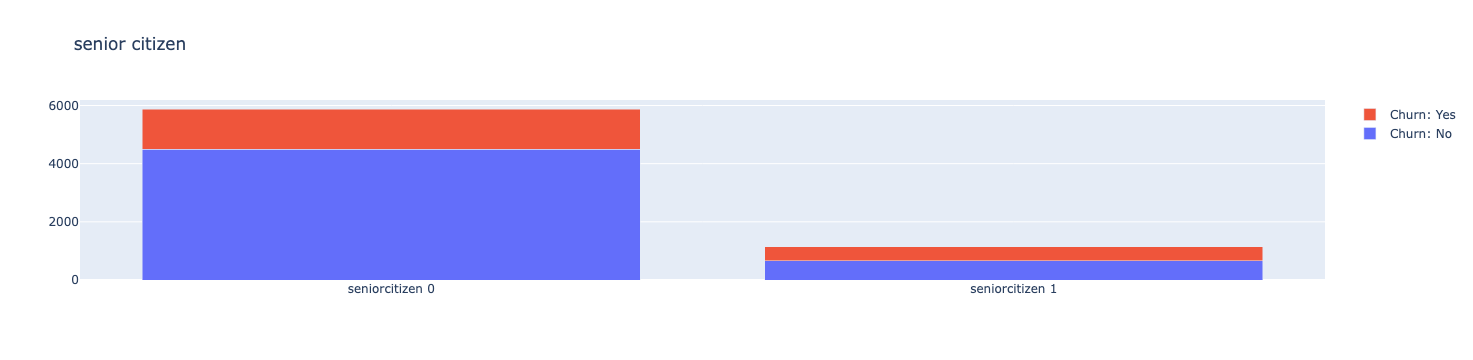

In [351]:
sc_keys = df.seniorcitizen.unique()

ind_labels = []
ind_values = []
for key in sc_keys:
    indi = df['seniorcitizen'][df['seniorcitizen']==key].groupby(by=df["churn"]).count()
    ind_labels.append('seniorcitizen' + ' ' + str(key))
    ind_values.append(indi)

names = ['Churn: No', 'Churn: Yes']
make_stack_bar(ind_labels,ind_values,names, 'senior citizen')

#
## Task 4: Churn Prediction Model
### Develop a churn prediction model using machine learning

In [469]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
%pip install Jinja2

In [451]:
models_classifiers = []
models_preds = []
def save_for_reports(m_clf, m_pred):
    models_classifiers.append(m_clf)
    models_preds.append(m_pred)

In [452]:
def display_confusion_matrix(cm_test, cm_pred):
    cm = confusion_matrix(cm_test, cm_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    #disp.plot(cmap="coolwarm")
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

In [453]:
y = df['churn'].map({'Yes': 1, 'No': 0})
X = df.drop(columns=['churn'])

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7021 non-null   object  
 1   seniorcitizen     7021 non-null   int64   
 2   partner           7021 non-null   int64   
 3   dependents        7021 non-null   int64   
 4   tenure            7021 non-null   int64   
 5   phoneservice      7021 non-null   object  
 6   multiplelines     7021 non-null   object  
 7   internetservice   7021 non-null   object  
 8   onlinesecurity    7021 non-null   object  
 9   onlinebackup      7021 non-null   object  
 10  deviceprotection  7021 non-null   object  
 11  techsupport       7021 non-null   object  
 12  streamingtv       7021 non-null   object  
 13  streamingmovies   7021 non-null   object  
 14  contract          7021 non-null   object  
 15  paperlessbilling  7021 non-null   int64   
 16  paymentmethod     7021 non-nu

In [455]:
# ---------- Feature Groups ----------
numeric_features = [
    'tenure',
    'monthlycharges',
    'totalcharges'
]

categorical_features = [
    'tenurebins',
    'contract',
    'paymentmethod',
    'gender',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies'
]


binary_features = [
    'seniorcitizen',
    'partner',
    'dependents',
    'paperlessbilling'
]

In [456]:
# ---------- Train-Test Split ----------
X_train, X_test, y_train, y_test = train_test_split(
    df[numeric_features + categorical_features + binary_features],
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [457]:
# ---------- Preprocessor ----------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('bin', 'passthrough', binary_features)
    ]
)

In [458]:
def build_model(classifier):
    # ---------- Full Pipeline ----------
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # ---------- Train ----------
    model.fit(X_train, y_train)
    
    # ---------- Evaluate ----------
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # ---------- Info ----------
    save_for_reports(classifier, y_pred)
    display_confusion_matrix(y_test, y_pred)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nROC-AUC:", roc_auc_score(y_test, y_prob))

## Logistic Regression

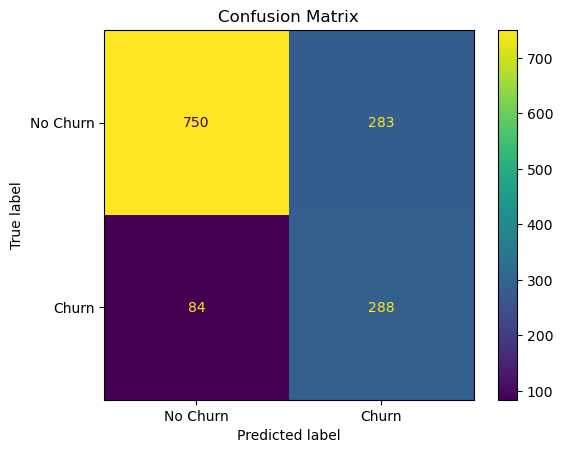


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.50      0.77      0.61       372

    accuracy                           0.74      1405
   macro avg       0.70      0.75      0.71      1405
weighted avg       0.79      0.74      0.75      1405


ROC-AUC: 0.8401734690691065


In [459]:
lr_classifier = LogisticRegression(
    max_iter=700,
    class_weight='balanced',
    solver='liblinear'
)

build_model(lr_classifier)

## Gradient Boosting

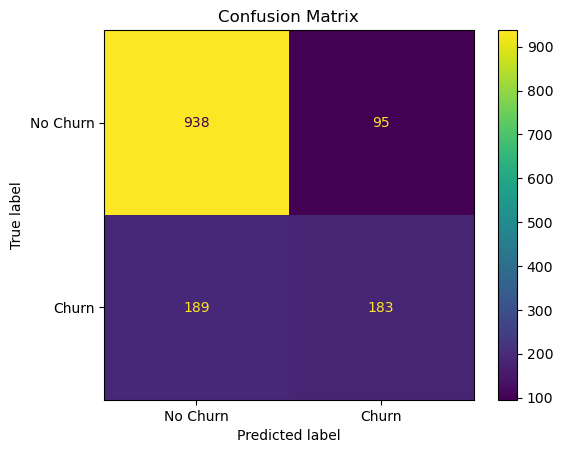


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.49      0.56       372

    accuracy                           0.80      1405
   macro avg       0.75      0.70      0.72      1405
weighted avg       0.79      0.80      0.79      1405


ROC-AUC: 0.8374462625821024


In [460]:
gb_classifier = GradientBoostingClassifier()
build_model(gb_classifier)

### The Gradient Boosting algorithm was one of the best performing.
### The confusion matrix shows how well the model predicts customer churn. It correctly identifies 938 non-churners and 183 churners. However 95 non-churners are wrongly classified as churners and 189 churners are missed.
#

## Decision Tree

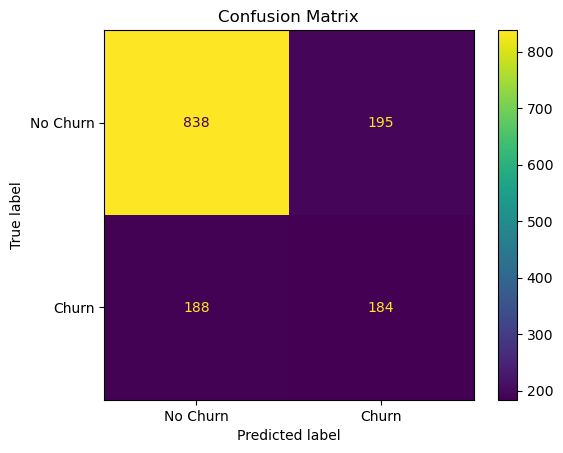


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1033
           1       0.49      0.49      0.49       372

    accuracy                           0.73      1405
   macro avg       0.65      0.65      0.65      1405
weighted avg       0.73      0.73      0.73      1405


ROC-AUC: 0.6548626508030686


In [461]:
dtree_classifier = DecisionTreeClassifier()
build_model(dtree_classifier)

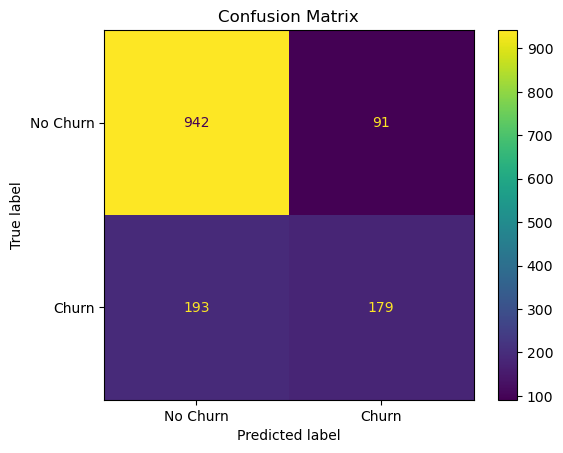


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.48      0.56       372

    accuracy                           0.80      1405
   macro avg       0.75      0.70      0.71      1405
weighted avg       0.79      0.80      0.79      1405


ROC-AUC: 0.8364651968897355


In [462]:
clf1 = LogisticRegression()
clf2 = GradientBoostingClassifier()
clf3 = RandomForestClassifier()

voting_classifier = VotingClassifier(estimators=[('lr', clf1), ('gb', clf2), ('rf', clf3)], voting='soft')
build_model(voting_classifier)

In [463]:
def get_reports(classifiers, predictions, y_test):
    reports = []
    for clf_r, pred in zip(classifiers, predictions):
        print('-'*55, f'\n{clf_r.__class__.__name__}', '\n'+'-'*55)
        print(classification_report(y_test, pred, digits=4))
        reports.append(
            classification_report(
                y_test, pred, output_dict=True))
    return reports

In [464]:
def get_metrics(reports):
    metrics_data = []
    metrics_idx = []
    for i, report in enumerate(reports):
        metric = []
        metric.append(round(report['accuracy']*100, 2))
        metric.append(round(report['1']['precision']*100, 2))
        metric.append(round(report['1']['recall']*100, 2))
        metric.append(round(report['1']['f1-score']*100, 2))
        metrics_idx.append(models_classifiers[i].__class__.__name__)
        metrics_data.append(metric)
    metrics_cols = ['%Accuracy', '%Precision', '%Recall', '%F1-Score']
    metrics_df = pd.DataFrame(metrics_data, index=metrics_idx, columns=metrics_cols)
    return metrics_df

#
## Before comparing the metrics, let's consider a few concepts.
## Accuracy: Accuracy provides the proportion of correctly classified instances.
## Precision: Precision focuses on the accuracy of positive predictions.
## Recall (Sensitivity or True Positive Rate): Recall measures the proportion of correctly predicted positive instances among all actual positive instances.
## F1 Score: F1 score is the harmonic mean of precision and recall.

In [466]:
reports1 = get_reports(
    models_classifiers,
    models_preds,
    y_test)

------------------------------------------------------- 
LogisticRegression 
-------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8993    0.7260    0.8034      1033
           1     0.5044    0.7742    0.6108       372

    accuracy                         0.7388      1405
   macro avg     0.7018    0.7501    0.7071      1405
weighted avg     0.7947    0.7388    0.7524      1405

------------------------------------------------------- 
GradientBoostingClassifier 
-------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8323    0.9080    0.8685      1033
           1     0.6583    0.4919    0.5631       372

    accuracy                         0.7979      1405
   macro avg     0.7453    0.7000    0.7158      1405
weighted avg     0.7862    0.7979    0.7876      1405

------------------------------------------------------- 
DecisionTreeCla

## Show metrics of Class 1 (Churn = Yes) prediction

In [470]:
metrics_df = get_metrics(reports1)
metrics_df.sort_values(by=['%Accuracy'], ascending=False, inplace=True)
metrics_df.style.background_gradient(cmap='Blues').format("{:.1f}")

,%Accuracy,%Precision,%Recall,%F1-Score
GradientBoostingClassifier,79.8,65.8,49.2,56.3
VotingClassifier,79.8,66.3,48.1,55.8
LogisticRegression,73.9,50.4,77.4,61.1
DecisionTreeClassifier,72.7,48.5,49.5,49.0


### To improve the prediction of the models, it may be necessary further tuning.

#
## Task 5: Customer Retention Strategies

### * Calculate the lifetime value (LTV) of customers.

### Basic CLV Formula (Simple Projection)
#### This method provides a quick estimate based on average values and a defined lifespan
#### Formula:
#### `CLV = Average Monthly Revenue X Customer Lifespan(in months)`
#### Or, more granularly: `CLV = ( Total Revenue / Total Customers) X Lifespan`

In [475]:
average_monthly_revenue = df.monthlycharges.sum() / len(df)
average_monthly_revenue

np.float64(64.85189431704886)

In [479]:
lifespan = df.tenure.mean()
lifespan

np.float64(32.46944879646774)

In [480]:
clv = average_monthly_revenue * lifespan
clv

np.float64(2105.705261881355)

#
### * Identify key factors influencing churn and suggest actions.
### * Propose data-driven strategies to reduce churn.

## According to the analysis, we have the following insights:
### 1. There is a high churn rate in the first month of tenure, and this extends to both the first and second year.
### 2. Customers with month to month contract tend to churn more.
### 3. Customers with Electronic check as payment method tend to churn more.
### 4. Users with no dependents or no partner seem to churn more, also senior citizens churn more.
### 5. Customers with fiber optic as the internet service seem to churn more
### 6. Customers with: no online security, no online backup, no device protection or no tech support tend to churn more.
### 7. TV or Movie streaming services have no significant effect on Churn

## There some strategies to reduce churn
### 1. I was able to identify that new customers are the highest risk group, so launching discounted packages in the first few months and maintain the incentives for the first 2 years could be a good strategy. Longer the customers stay more likely they won't churn.
### 2. Launch campaigns to encourage customers to switch to longer contracts, preferably 2 years.
### 3. Encourage customers to switch their payment method to an automatic one, thereby reducing friction.
### 4. Launch loyalty programs for customers with no dependants or no partner and customers that are senior citizens
### 5. The fiber optic service needs significant quality improvement.
### 6. Promote and provide better information about online security, online backup, device protection and tech support, perhaps adding them as a bonus to existing packages or offering a trial.
### 7. While TV or Movie streaming services have no effect on customer churn, the number of customers who do have them and leave is significant. Promote this services or if the costs are high, distribute the funds to other services.

#
# Conclusion
## This project focuses on analyzing the churn rate of a telecommunications company. The churn rate is a crucial metric, as it is much more cost-effective to retain existing customers than to acquire new ones. Therefore, the main objectives of the project are:
## 1- Analyze the churn rate
## 2- Identify at-risk customers
## 3- Provide actionable insights and recommendations to reduce the churn rate and improve customer retention.
## After a detailed analysis, the objectives were achieved. A statistical analysis and data visualization were performed, a predictive model was developed using machine learning and data-driven strategies were proposed.